In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
cleaned_data = pd.read_excel("Cleaned_formated_data.xlsx")

In [3]:
cleaned_data.sample(10)

,id,username,status,assigned_to,created_on,created_on_ist_time,created_on_buckets,created_on_year,created_on_month,created_on_day,...,updated_by,group_id,image_type,shoot_id,og_reported_by,second_opinion,rejected_by,RAS_count,reporting_extended,reporting_time_limit
37187,51434,Shree_Sai_0,viewed,Dr_Prajakta_Pawnikar,2020-07-20 07:40:08,2020-07-20 13:10:08,4 - Created between 12PM - 4PM,2020,July,Monday,...,Shree_Sai_0,40129,xray,0,NaN,NaN,None,1,0,2020-07-20 09:57:56
31859,46393,VDC_1,viewed,Dr_Jayesh_Shah,2020-07-07 11:09:33,2020-07-07 16:39:33,5 - Created between 4PM - 8PM,2020,July,Tuesday,...,VDC_1,35876,xray,0,NaN,NaN,None,1,0,2020-07-07 12:30:46
35535,50314,Ashwini_1,viewed,Dr_Prajakta_Pawnikar,2020-07-17 06:33:10,2020-07-17 12:03:10,4 - Created between 12PM - 4PM,2020,July,Friday,...,Ashwini_1,39173,xray,0,NaN,NaN,None,1,0,2020-07-17 09:14:33
24192,35281,Aghila_Portable,viewed,Dr_Prajakta_Pawnikar,2020-06-09 12:42:46,2020-06-09 18:12:46,5 - Created between 4PM - 8PM,2020,June,Tuesday,...,Aghila_Portable,26632,xray,0,NaN,NaN,None,1,0,2020-06-09 13:51:50
5837,10633,Ashwini_1,viewed,Dr_Nikunj_Kothia,2020-01-06 07:16:37,2020-01-06 12:46:37,4 - Created between 12PM - 4PM,2020,January,Monday,...,Ashwini_1,6454,xray,0,NaN,NaN,None,1,0,NaT
25116,35694,Drone_1,viewed,Dr_Nikunj_Kothia,2020-06-10 10:35:50,2020-06-10 16:05:50,5 - Created between 4PM - 8PM,2020,June,Wednesday,...,Drone_1,26982,xray,0,NaN,NaN,None,1,0,2020-06-10 12:41:50
21583,32894,NHDC_1,viewed,Dr_Prajakta_Pawnikar,2020-06-02 14:32:21,2020-06-02 20:02:21,6 - Created after 8PM,2020,June,Tuesday,...,NHDC_1,24507,xray,0,NaN,NaN,None,1,0,2020-06-02 15:11:49
18534,28032,Sneha_1,viewed,Dr_Nikunj_Kothia,2020-05-13 16:53:54,2020-05-13 22:23:54,6 - Created after 8PM,2020,May,Wednesday,...,Sneha_1,20438,xray,0,NaN,NaN,None,1,0,2020-05-13 19:55:58
32308,45832,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-07-06 09:27:31,2020-07-06 14:57:31,4 - Created between 12PM - 4PM,2020,July,Monday,...,Gayatri_1,35410,xray,0,NaN,NaN,None,1,0,2020-07-06 11:37:36
36320,50941,Maxim_1,viewed,Dr_Nikunj_Kothia,2020-07-18 11:40:22,2020-07-18 17:10:22,5 - Created between 4PM - 8PM,2020,July,Saturday,...,Maxim_1,39716,xray,0,NaN,NaN,None,1,0,2020-07-18 12:24:40


In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40778 entries, 0 to 40777
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       40778 non-null  int64         
 1   username                 40778 non-null  object        
 2   status                   40778 non-null  object        
 3   assigned_to              40778 non-null  object        
 4   created_on               40778 non-null  datetime64[ns]
 5   created_on_ist_time      40778 non-null  datetime64[ns]
 6   created_on_buckets       40778 non-null  object        
 7   created_on_year          40778 non-null  int64         
 8   created_on_month         40778 non-null  object        
 9   created_on_day           40778 non-null  object        
 10  created_by               34566 non-null  object        
 11  updated_on               40778 non-null  datetime64[ns]
 12  updated_on_ist_time      40778 n

In [5]:
# Convert created_on_month and updated_on_month column into numbers
cleaned_data.created_on_month = cleaned_data.created_on_month.apply(lambda x : datetime.datetime.strptime(x,'%B').month)
cleaned_data.updated_on_month = cleaned_data.updated_on_month.apply(lambda x : datetime.datetime.strptime(x,'%B').month)

# Convert created_on_day and updated_on_day column into numbers
cleaned_data.created_on_day = pd.DatetimeIndex(cleaned_data.created_on_ist_time).weekday
cleaned_data.updated_on_day = pd.DatetimeIndex(cleaned_data.updated_on_ist_time).weekday



In [6]:
cleaned_data.drop(columns=['id','reporting_time_limit','reporting_extended','RAS_count','second_opinion',
                           'og_reported_by','shoot_id','image_type','group_id','updated_by',
                          'elapsed_time_bucket_hrs','created_on','updated_on','username','status','assigned_to',
                           'rejected_by','hours','minutes'],inplace=True)

In [7]:
# Extract only date from created on date column
cleaned_data.insert(1,column='created_on_date',value=cleaned_data.created_on_ist_time.apply(lambda x : str(x).split(' ')[0].split('-')[-1]))
cleaned_data.insert(10,column='updated_on_date',value=cleaned_data.updated_on_ist_time.apply(lambda x : str(x).split(' ')[0].split('-')[-1]))
# # Extract only hrs,mins from created_on_ist_time column
cleaned_data.insert(2,column='created_on_hrs',value=cleaned_data.created_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[0]))
cleaned_data.insert(3,column='created_on_minutes',value=cleaned_data.created_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[1]))

# # Extract only hrs,mins from updated_on_ist_time column
cleaned_data.insert(10,column='updated_on_hrs',value=cleaned_data.updated_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[0]))
cleaned_data.insert(11,column='updated_on_minutes',value=cleaned_data.updated_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[1]))


In [8]:
cleaned_data.drop(columns=['created_on_ist_time','time_elapsed'],inplace=True)
cleaned_data.drop(columns=['created_by'],inplace=True)
cleaned_data.drop(columns=['updated_on_ist_time'],inplace=True)

In [9]:
cleaned_data[['created_on_date','created_on_month','created_on_year','created_on_hrs','created_on_minutes','created_on_day','created_on_buckets',
             'updated_on_date','updated_on_month','updated_on_year','updated_on_hrs','updated_on_minutes','updated_on_day','updated_on_buckets']].shape

(40778, 14)

In [10]:
final_df = cleaned_data[['created_on_date','created_on_month','created_on_year','created_on_hrs','created_on_minutes','created_on_day','elapsed_time_min']]

In [11]:
final_df

,created_on_date,created_on_month,created_on_year,created_on_hrs,created_on_minutes,created_on_day,elapsed_time_min
0,03,8,2020,14,24,0,37
1,03,8,2020,12,51,0,5
2,03,8,2020,12,55,0,112
3,03,8,2020,13,10,0,16
4,03,8,2020,14,22,0,40
...,...,...,...,...,...,...,...
40773,03,8,2020,13,06,0,103
40774,03,8,2020,14,24,0,34
40775,03,8,2020,13,04,0,109
40776,03,8,2020,12,56,0,114


In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40778 entries, 0 to 40777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_on_date     40778 non-null  object
 1   created_on_hrs      40778 non-null  object
 2   created_on_minutes  40778 non-null  object
 3   created_on_buckets  40778 non-null  object
 4   created_on_year     40778 non-null  int64 
 5   created_on_month    40778 non-null  int64 
 6   created_on_day      40778 non-null  int64 
 7   updated_on_hrs      40778 non-null  object
 8   updated_on_minutes  40778 non-null  object
 9   updated_on_buckets  40778 non-null  object
 10  updated_on_year     40778 non-null  int64 
 11  updated_on_date     40778 non-null  object
 12  updated_on_month    40778 non-null  int64 
 13  updated_on_day      40778 non-null  int64 
 14  elapsed_time_min    40778 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.7+ MB


In [13]:
cleaned_data.created_on_date = cleaned_data.created_on_date.astype(np.int64)
cleaned_data.created_on_hrs  = cleaned_data.created_on_hrs.astype(np.int64)
cleaned_data.created_on_minutes = cleaned_data.created_on_minutes.astype(np.int64)
cleaned_data.updated_on_hrs = cleaned_data.updated_on_hrs.astype(np.int64)
cleaned_data.updated_on_minutes = cleaned_data.updated_on_minutes.astype(np.int64)
cleaned_data.updated_on_date = cleaned_data.updated_on_date.astype(np.int64)

<AxesSubplot:>

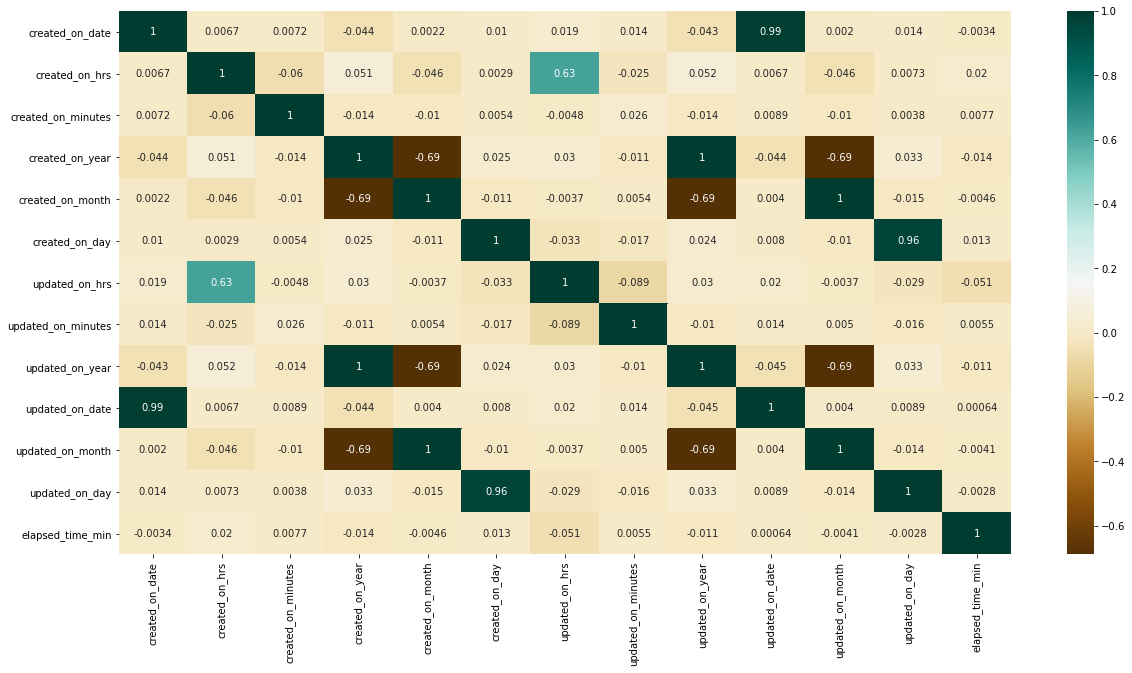

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_data.corr(),cmap='BrBG',annot=True)

In [216]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [221]:
X = cleaned_data.drop(columns=['elapsed_time_min','created_on_buckets','updated_on_buckets'])
y = cleaned_data.elapsed_time_min

In [222]:
bestFeatures = SelectKBest(score_func=chi2,k=10)
fit = bestFeatures.fit(X,y)

In [223]:
fit.scores_

array([6.75344898e+03, 6.84545918e+03, 1.39786175e+04, 1.09212605e-01,
       2.47135182e+03, 2.68020949e+03, 4.24185562e+03, 1.35123366e+04,
       6.88627518e+03, 1.08238342e-01, 2.45775215e+03, 2.44332037e+03])

In [141]:
cleaned_data[['created_on_year','created_on_month','created_on_date','created_on_hrs','created_on_minutes','created_on_day','created_on_buckets','updated_on_year','','','','']]

,created_on_date,created_on_hrs,created_on_minutes,created_on_buckets,created_on_year,created_on_month,created_on_day,updated_on_buckets,updated_on_hrs,updated_on_minutes,updated_on_year,updated_on_month,updated_on_day,elapsed_time_min
0,03,14,24,4 - Created between 12PM - 4PM,2020,8,0,4 - Updated between 12PM - 4PM,15,02,2020,8,0,37
1,03,12,51,4 - Created between 12PM - 4PM,2020,8,0,4 - Updated between 12PM - 4PM,12,57,2020,8,0,5
2,03,12,55,4 - Created between 12PM - 4PM,2020,8,0,4 - Updated between 12PM - 4PM,14,48,2020,8,0,112
3,03,13,10,4 - Created between 12PM - 4PM,2020,8,0,4 - Updated between 12PM - 4PM,13,26,2020,8,0,16
4,03,14,22,4 - Created between 12PM - 4PM,2020,8,0,4 - Updated between 12PM - 4PM,15,02,2020,8,0,40


In [16]:
# # Extract only date from created on date column
# cleaned_data.created_on_date = cleaned_data.created_on_date.apply(lambda x : str(x).split("-")[-1])

# # Extract only hrs,mins from created_on_ist_time column
# cleaned_data.insert(2,column='created_on_hrs',value=cleaned_data.created_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[0]))
# cleaned_data.insert(3,column='created_on_minutes',value=cleaned_data.created_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[1]))

# # Extract only hrs,mins from updated_on_ist_time column
# cleaned_data.insert(10,column='updated_on_hrs',value=cleaned_data.updated_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[0]))
# cleaned_data.insert(11,column='updated_on_minutes',value=cleaned_data.updated_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[1]))


In [17]:
cleaned_data.insert(1,column='created_on_date',value=cleaned_data['created_on_ist_time'].dt.date)

KeyError: 'created_on_ist_time'

In [18]:
cleaned_data

,created_on_date,created_on_hrs,created_on_minutes,created_on_buckets,created_on_year,created_on_month,created_on_day,updated_on_hrs,updated_on_minutes,updated_on_buckets,updated_on_year,updated_on_date,updated_on_month,updated_on_day,elapsed_time_min
0,3,14,24,4 - Created between 12PM - 4PM,2020,8,0,15,2,4 - Updated between 12PM - 4PM,2020,3,8,0,37
1,3,12,51,4 - Created between 12PM - 4PM,2020,8,0,12,57,4 - Updated between 12PM - 4PM,2020,3,8,0,5
2,3,12,55,4 - Created between 12PM - 4PM,2020,8,0,14,48,4 - Updated between 12PM - 4PM,2020,3,8,0,112
3,3,13,10,4 - Created between 12PM - 4PM,2020,8,0,13,26,4 - Updated between 12PM - 4PM,2020,3,8,0,16
4,3,14,22,4 - Created between 12PM - 4PM,2020,8,0,15,2,4 - Updated between 12PM - 4PM,2020,3,8,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40773,3,13,6,4 - Created between 12PM - 4PM,2020,8,0,14,50,4 - Updated between 12PM - 4PM,2020,3,8,0,103
40774,3,14,24,4 - Created between 12PM - 4PM,2020,8,0,14,58,4 - Updated between 12PM - 4PM,2020,3,8,0,34
40775,3,13,4,4 - Created between 12PM - 4PM,2020,8,0,14,54,4 - Updated between 12PM - 4PM,2020,3,8,0,109
40776,3,12,56,4 - Created between 12PM - 4PM,2020,8,0,14,50,4 - Updated between 12PM - 4PM,2020,3,8,0,114


In [149]:
new_df = pd.read_excel("Cleaned_formated_data.xlsx")

In [151]:
new_df.columns

Index(['id', 'username', 'status', 'assigned_to', 'created_on',
       'created_on_ist_time', 'created_on_buckets', 'created_on_year',
       'created_on_month', 'created_on_day', 'created_by', 'updated_on',
       'updated_on_ist_time', 'updated_on_buckets', 'updated_on_year',
       'updated_on_month', 'updated_on_day', 'time_elapsed', 'hours',
       'minutes', 'elapsed_time_min', 'elapsed_time_bucket_hrs', 'updated_by',
       'group_id', 'image_type', 'shoot_id', 'og_reported_by',
       'second_opinion', 'rejected_by', 'RAS_count', 'reporting_extended',
       'reporting_time_limit'],
      dtype='object')

In [159]:
X = new_df.drop(columns=['elapsed_time_min','id'])
y = new_df.elapsed_time_min

In [162]:
bestFeatures = SelectKBest(score_func=chi2,k=10)
fit = bestFeatures.fit(X,y)

ValueError: could not convert string to float: 'Drone_1'

<AxesSubplot:>

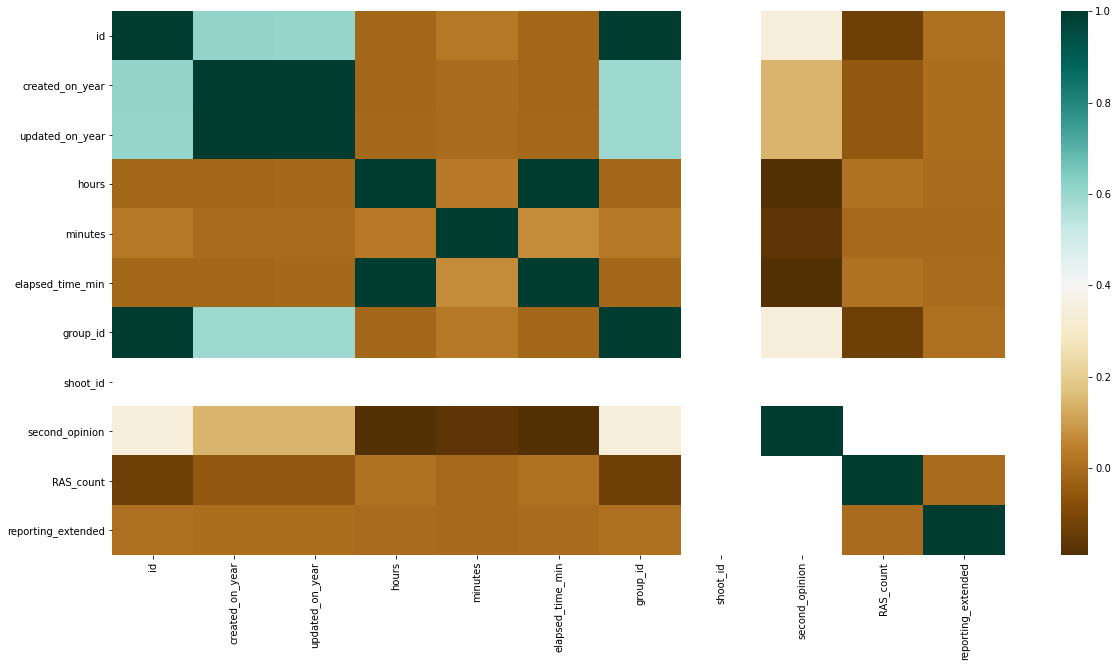

In [163]:
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(),cmap='BrBG')

<AxesSubplot:>

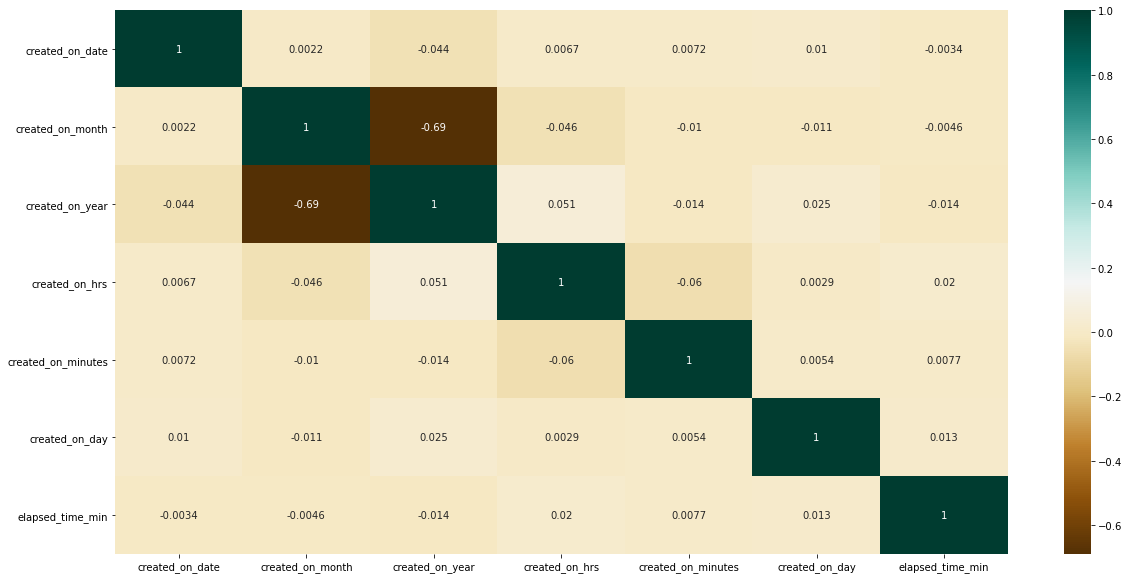

In [230]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),cmap='BrBG',annot=True)

<AxesSubplot:xlabel='elapsed_time_min'>

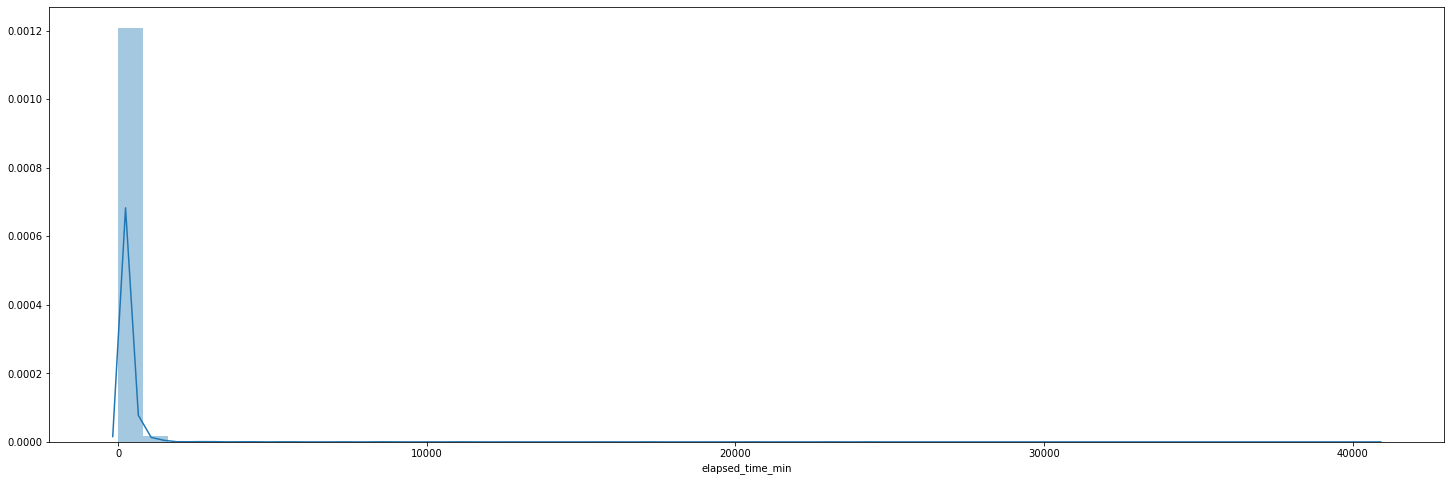

In [232]:
sns.distplot(final_df.elapsed_time_min)

In [234]:
raw_df = pd.read_excel("Cleaned_formated_data.xlsx")

In [236]:
raw_df.columns

Index(['id', 'username', 'status', 'assigned_to', 'created_on',
       'created_on_ist_time', 'created_on_buckets', 'created_on_year',
       'created_on_month', 'created_on_day', 'created_by', 'updated_on',
       'updated_on_ist_time', 'updated_on_buckets', 'updated_on_year',
       'updated_on_month', 'updated_on_day', 'time_elapsed', 'hours',
       'minutes', 'elapsed_time_min', 'elapsed_time_bucket_hrs', 'updated_by',
       'group_id', 'image_type', 'shoot_id', 'og_reported_by',
       'second_opinion', 'rejected_by', 'RAS_count', 'reporting_extended',
       'reporting_time_limit'],
      dtype='object')

In [241]:
from pycaret.regression import *

In [300]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40778 entries, 0 to 40777
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   created_on_date     40778 non-null  int64
 1   created_on_month    40778 non-null  int64
 2   created_on_year     40778 non-null  int64
 3   created_on_hrs      40778 non-null  int64
 4   created_on_minutes  40778 non-null  int64
 5   created_on_day      40778 non-null  int64
 6   elapsed_time_min    40778 non-null  int64
dtypes: int64(7)
memory usage: 2.2 MB


In [295]:
train_data = final_df.sample(frac=0.8,random_state=786).reset_index(drop=True)
unseen_data = final_df.drop(train_data.index).reset_index(drop=True)

In [301]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32622 entries, 0 to 32621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   created_on_date     32622 non-null  int64
 1   created_on_month    32622 non-null  int64
 2   created_on_year     32622 non-null  int64
 3   created_on_hrs      32622 non-null  int64
 4   created_on_minutes  32622 non-null  int64
 5   created_on_day      32622 non-null  int64
 6   elapsed_time_min    32622 non-null  int64
dtypes: int64(7)
memory usage: 1.7 MB


In [303]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   created_on_date     8156 non-null   int64
 1   created_on_month    8156 non-null   int64
 2   created_on_year     8156 non-null   int64
 3   created_on_hrs      8156 non-null   int64
 4   created_on_minutes  8156 non-null   int64
 5   created_on_day      8156 non-null   int64
 6   elapsed_time_min    8156 non-null   int64
dtypes: int64(7)
memory usage: 446.2 KB


In [304]:
base_setup = setup(data=train_data,target='elapsed_time_min')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4690
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(32622, 7)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [305]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,89.1207,162657.4464,380.7847,0.0617,1.3802,4.8941,0.1872
1,Gradient Boosting Regressor,95.0625,167359.9636,384.5957,0.0505,1.4521,5.4748,1.7692
2,Linear Regression,107.0881,167677.6768,388.3293,0.0115,1.5558,6.1622,0.0264
3,Ridge Regression,107.0861,167677.4320,388.3290,0.0115,1.5558,6.1625,0.0135
4,Bayesian Ridge,106.9624,167696.1490,388.3637,0.0111,1.5606,6.2152,0.0556
5,Lasso Regression,107.1655,167918.0765,388.6592,0.0092,1.5720,6.3352,0.0533
6,Random Sample Consensus,101.7926,168030.3767,388.7761,0.0089,1.4923,5.2870,1.8260
7,Orthogonal Matching Pursuit,107.4723,168533.6978,389.4746,0.0042,1.5794,6.4006,0.0164
8,TheilSen Regressor,95.1253,168863.9235,389.8414,0.0026,1.4236,4.5498,9.0897
9,Elastic Net,108.4734,168609.3326,389.6604,0.0023,1.5971,6.5847,0.0298


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4690, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
final_df.created_on_date = final_df.created_on_date.astype(np.int64)
final_df.created_on_hrs = final_df.created_on_hrs.astype(np.int64)
final_df.created_on_minutes = final_df.created_on_minutes.astype(np.int64)

In [123]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40778 entries, 0 to 40777
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   created_on_month    40778 non-null  int64
 1   created_on_year     40778 non-null  int64
 2   created_on_hrs      40778 non-null  int64
 3   created_on_minutes  40778 non-null  int64
 4   created_on_day      40778 non-null  int64
 5   elapsed_time_min    40778 non-null  int64
dtypes: int64(6)
memory usage: 1.9 MB


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [122]:
final_df.drop(columns=['created_on_date'],inplace=True)

In [109]:
X = final_df.drop(columns='elapsed_time_min')
y = final_df.elapsed_time_min

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [111]:
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_train : {}".format(y_train.shape))
print("y_test : {}".format(y_test.shape))

X_train : (32622, 6)
X_test : (8156, 6)
y_train : (32622,)
y_test : (8156,)


In [91]:
LinearReg_model = LinearRegression()
LinearReg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
ceoff_df = pd.DataFrame(LinearReg_model.coef_,X.columns,columns=[['Coefficient']])

In [93]:
ceoff_df

,Coefficient
created_on_date,-0.323808
created_on_month,-3.849288
created_on_year,-41.594446
created_on_hrs,2.324490
created_on_minutes,0.278139
created_on_day,4.060464


In [94]:
y_pred = LinearReg_model.predict(X_test)

In [95]:
diff = pd.DataFrame({'Actual test':y_test,'Predicted test':y_pred})

In [96]:
pwd

'D:\\x_rays_eda_updated\\final_findings'

In [98]:
diff.to_csv("D:\\x_rays_eda_updated\\final_findings\\test_pred.csv",header=True,index=True)

In [113]:
final_df[(final_df.created_on_date==3) & (final_df.created_on_month==8) & (final_df.created_on_year==2020) & (final_df.created_on_hrs==14)]

,created_on_date,created_on_month,created_on_year,created_on_hrs,created_on_minutes,created_on_day,elapsed_time_min
0,3,8,2020,14,24,0,37
4,3,8,2020,14,22,0,40
5,3,8,2020,14,24,0,45
6,3,8,2020,14,24,0,46
7,3,8,2020,14,20,0,50
10,3,8,2020,14,25,0,51
36,3,8,2020,14,12,0,91
39,3,8,2020,14,21,0,88
42,3,8,2020,14,24,0,85
46,3,8,2020,14,26,0,85


In [285]:
LinearReg_model.predict([[3,8,2019,14,41,5]])

array([161.28037106])

### Run Again

In [29]:
new_cl_df = pd.read_excel("Cleaned_formated_data.xlsx")

In [57]:
train_df_final =new_cl_df[['created_on_hrs','created_on_minutes','created_on_date','created_on_year','created_on_month','created_on_day','elapsed_time_min']]

In [36]:
# new_cl_df.insert(7,column='created_on_date',value=new_cl_df.created_on_ist_time.apply(lambda x : str(x).split(' ')[0].split('-')[-1]))
new_cl_df.insert(9,column='created_on_hrs',value=new_cl_df.created_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[0]))
new_cl_df.insert(10,column='created_on_minutes',value=new_cl_df.created_on_ist_time.apply(lambda x : str(x).split(' ')[-1].split(':')[1]))

In [55]:
# new_cl_df.created_on_date = new_cl_df.created_on_date.astype(np.int64)
new_cl_df.created_on_hrs = new_cl_df.created_on_hrs.astype(np.int64)
new_cl_df.created_on_minutes = new_cl_df.created_on_minutes.astype(np.int64)
new_cl_df.created_on_year = new_cl_df.created_on_year.astype(np.int64)

In [58]:
train_df_final

,created_on_hrs,created_on_minutes,created_on_date,created_on_year,created_on_month,created_on_day,elapsed_time_min
0,14,24,3,2020,August,Monday,37
1,12,51,3,2020,August,Monday,5
2,12,55,3,2020,August,Monday,112
3,13,10,3,2020,August,Monday,16
4,14,22,3,2020,August,Monday,40
...,...,...,...,...,...,...,...
40773,13,6,3,2020,August,Monday,103
40774,14,24,3,2020,August,Monday,34
40775,13,4,3,2020,August,Monday,109
40776,12,56,3,2020,August,Monday,114


<AxesSubplot:>

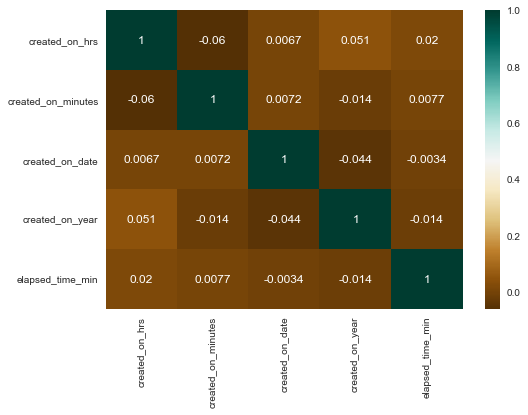

In [82]:
sns.heatmap(train_df_final.corr(),cmap='BrBG',annot=True)

In [59]:
train_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40778 entries, 0 to 40777
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_on_hrs      40778 non-null  int64 
 1   created_on_minutes  40778 non-null  int64 
 2   created_on_date     40778 non-null  int64 
 3   created_on_year     40778 non-null  int64 
 4   created_on_month    40778 non-null  object
 5   created_on_day      40778 non-null  object
 6   elapsed_time_min    40778 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.2+ MB


In [60]:
from pycaret.regression import *
train_data_final = train_df_final.sample(frac=0.8,random_state=786).reset_index(drop=True)
unseen_data_final = train_df_final.drop(train_data_final.index).reset_index(drop=True)

In [61]:
train_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32622 entries, 0 to 32621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_on_hrs      32622 non-null  int64 
 1   created_on_minutes  32622 non-null  int64 
 2   created_on_date     32622 non-null  int64 
 3   created_on_year     32622 non-null  int64 
 4   created_on_month    32622 non-null  object
 5   created_on_day      32622 non-null  object
 6   elapsed_time_min    32622 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.7+ MB


In [62]:
unseen_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_on_hrs      8156 non-null   int64 
 1   created_on_minutes  8156 non-null   int64 
 2   created_on_date     8156 non-null   int64 
 3   created_on_year     8156 non-null   int64 
 4   created_on_month    8156 non-null   object
 5   created_on_day      8156 non-null   object
 6   elapsed_time_min    8156 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 446.2+ KB


In [79]:
base_setup_final = setup(data=train_data_final,target='elapsed_time_min',session_id=3344)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3344
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(32622, 7)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [80]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,89.7338,116937.1616,317.0197,0.1114,1.4394,5.3023,1.7926
1,Light Gradient Boosting Machine,83.9698,117302.2216,317.7112,0.1065,1.3607,4.7090,0.1866
2,Linear Regression,105.3136,123889.8077,329.5920,0.0196,1.5505,6.0936,0.0378
3,Ridge Regression,105.3114,123889.6686,329.5919,0.0196,1.5505,6.0939,0.0199
4,Bayesian Ridge,105.1907,123900.7588,329.6227,0.0193,1.5532,6.1240,0.0468
5,Random Sample Consensus,101.1747,124035.7546,329.8036,0.0182,1.4960,5.3908,1.7579
6,Lasso Regression,105.3667,124090.4580,329.9555,0.0167,1.5647,6.2311,0.0632
7,Orthogonal Matching Pursuit,105.4161,124529.0576,330.7525,0.0102,1.5653,6.2476,0.0231
8,Elastic Net,107.0672,125002.6840,331.5218,0.0049,1.5941,6.5167,0.0298
9,TheilSen Regressor,94.4355,125122.8713,331.6261,0.0047,1.4294,4.5979,9.1367


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3344, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Create a model of LGBMRegressor

In [68]:
created_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,84.6398,66668.7675,258.2030,0.0587,1.4229,5.4170
1,96.2021,329699.9963,574.1951,0.0233,1.3594,4.3417
2,78.1580,54438.3699,233.3203,0.1375,1.3299,4.3392
3,81.1824,32713.4583,180.8686,0.1767,1.3251,4.3913
4,91.5277,90225.2046,300.3751,-0.0656,1.3740,5.3687
5,106.7573,452469.0301,672.6582,0.0341,1.3631,4.8848
6,99.9397,316601.9289,562.6739,-0.0101,1.4370,5.7283
7,85.7467,60565.8122,246.1012,0.0948,1.3926,5.0950
8,100.0945,333682.6328,577.6527,0.0103,1.3802,4.8444
9,93.2139,57375.7316,239.5323,0.0059,1.4167,5.3965


In [69]:
print(created_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=766, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Tune a model

In [71]:
tuned_model = tune_model(created_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,86.6645,69422.8995,263.4823,0.0198,1.4298,5.4517
1,99.5856,331648.9992,575.8897,0.0175,1.3797,4.3919
2,81.4557,55662.6404,235.9293,0.1181,1.3419,4.3559
3,84.2872,34689.7559,186.2519,0.1269,1.3556,4.4533
4,95.5544,96392.2152,310.4710,-0.1384,1.3729,5.2634
5,109.3026,451439.2628,671.8923,0.0363,1.3698,4.8722
6,102.2741,321119.5854,566.6741,-0.0245,1.4240,5.1332
7,90.3162,64807.9707,254.5741,0.0314,1.4173,5.4382
8,103.1035,338416.2198,581.7355,-0.0037,1.3829,4.7687
9,97.8869,62883.7273,250.7663,-0.0895,1.4289,5.3405


In [72]:
print(tuned_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=110,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=90, n_jobs=-1, num_leaves=20, objective=None,
              random_state=766, reg_alpha=0.1, reg_lambda=0.2, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Plot a model

### 1 - Residual Plot

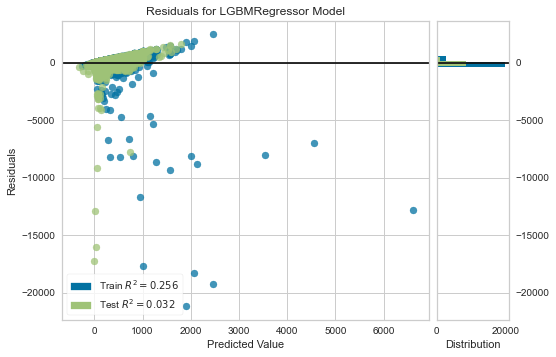

In [73]:
plot_model(tuned_model)

### 2 - Prediction error plot

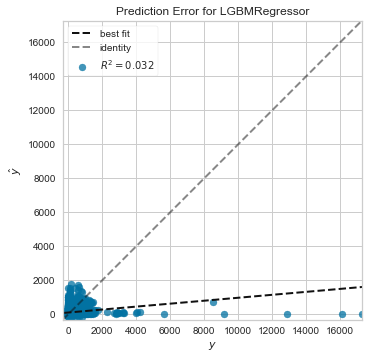

In [74]:
plot_model(tuned_model,plot='error')

### 3 - Feature Importance plot

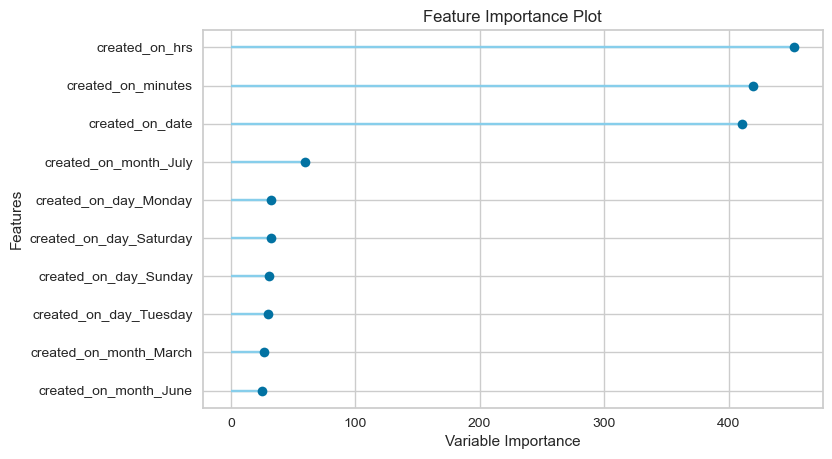

In [75]:
plot_model(tuned_model,plot='feature')

In [76]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
final_model = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,90.5704,128363.4357,358.2784,0.032,1.3674,4.6524


### Predict of unseen data

In [78]:
unseen_predictions = predict_model(final_model, data=unseen_data_final)
unseen_predictions.head()

AttributeError: 'DataFrame' object has no attribute 'predict'